<a href="https://colab.research.google.com/github/dianip/us-data-jobs-looker-studio/blob/main/us_data_jobs_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
#Collecting credentials
auth.authenticate_user()
#Query Bigquery
query = "SELECT * FROM `data-jobs-roles-analyst.Glassdoor.Glassdoor_cleanV3`"
df = pd.read_gbq(query, project_id = "data-jobs-roles-analyst")
df.head()

<ipython-input-1-b8afaaefe25e>:11: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id = "data-jobs-roles-analyst")


,job_title,rating,size,owner_type,industry,sector,revenue,avg_salary,python,r_language,spark,aws,excel,city,state
0,Senior Data Engineer,3.2,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),134.0,0,0,1,1,0,Charlotte,NC
1,Data Scientist,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),96.5,1,0,1,0,0,Portland,OR
2,Data Scientist,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),110.0,1,0,0,0,1,Chantilly,VA
3,Big Data Engineer,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),118.5,1,0,1,0,0,Chantilly,VA
4,Data Scientist,4.5,5001 to 10000 employees,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),130.0,1,0,0,0,1,Laurel,MD


In [ ]:
df.shape

(457, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job_title   457 non-null    object 
 1   rating      457 non-null    float64
 2   size        457 non-null    object 
 3   owner_type  457 non-null    object 
 4   industry    457 non-null    object 
 5   sector      457 non-null    object 
 6   revenue     457 non-null    object 
 7   avg_salary  457 non-null    float64
 8   python      457 non-null    Int64  
 9   r_language  457 non-null    Int64  
 10  spark       457 non-null    Int64  
 11  aws         457 non-null    Int64  
 12  excel       457 non-null    Int64  
 13  city        457 non-null    object 
 14  state       457 non-null    object 
dtypes: Int64(5), float64(2), object(8)
memory usage: 55.9+ KB


In [ ]:
df.describe()

,rating,avg_salary,python,r_language,spark,aws,excel
count,457.000000,457.000000,457.0,457.0,457.0,457.0,457.0
mean,3.719475,100.549234,0.562363,0.004376,0.242888,0.238512,0.533917
std,0.567266,37.008805,0.496639,0.066082,0.429298,0.426641,0.499395
min,1.900000,13.500000,0.0,0.0,0.0,0.0,0.0
25%,3.400000,75.500000,0.0,0.0,0.0,0.0,0.0
50%,3.700000,97.000000,1.0,0.0,0.0,0.0,1.0
75%,4.100000,121.000000,1.0,0.0,0.0,0.0,1.0
max,5.000000,254.000000,1.0,1.0,1.0,1.0,1.0


<Axes: xlabel='avg_salary', ylabel='Count'>

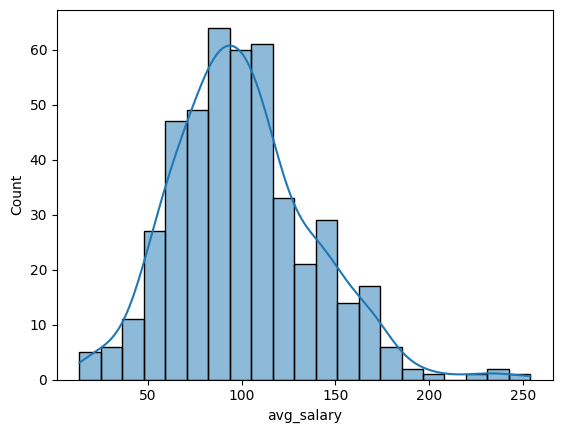

In [ ]:
# Plot the histogram thanks to the displot function
sns.histplot(data=df["avg_salary"], kde=True )

In [ ]:
# create column for tool count
df['tool_count'] = df[['python', 'r_language', 'spark', 'aws', 'excel']].sum(axis=1)

In [ ]:
# do an average salary for tool count
tool_salary = df.groupby('tool_count')['avg_salary'].agg(['mean', 'count']).reset_index()
tool_salary.columns = ['tool_count', 'avg_salary_mean', 'job_count']
tool_salary

,tool_count,avg_salary_mean,job_count
0,0,90.368056,72
1,1,91.955128,156
2,2,109.753521,142
3,3,109.161538,65
4,4,109.954545,22


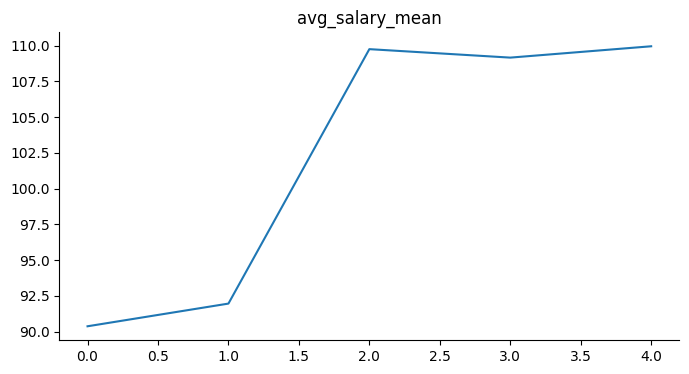

In [ ]:
# @title avg_salary_mean

from matplotlib import pyplot as plt
tool_salary['avg_salary_mean'].plot(kind='line', figsize=(8, 4), title='avg_salary_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='tool_count', ylabel='Count'>

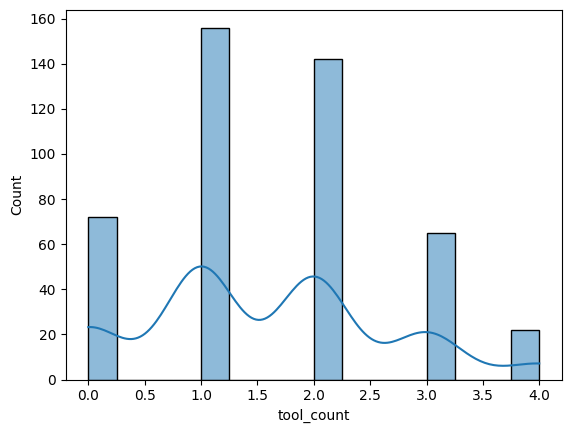

In [ ]:
# Plot the histogram thanks to the displot function
sns.histplot( data=df["tool_count"], kde=True )

In [ ]:
# Group by 'industry' and sum the 'python' column
industry_python_sum = df.groupby('industry')['python'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot using the aggregated data
fig = px.bar(industry_python_sum, x="industry", y="python", title="Total Python Job Postings per Industry")
fig.show()

In [ ]:
# Group by 'industry' and sum the 'python' column
industry_python_sum = df.groupby('industry')['r_language'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot using the aggregated data
fig = px.bar(industry_python_sum, x="industry", y="r_language", color_discrete_sequence = ["green"], title="Total R_language Job Postings per Industry")
fig.show()

In [ ]:
# Group by 'industry' and sum the 'python' column
industry_python_sum = df.groupby('industry')['aws'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot using the aggregated data
fig = px.bar(industry_python_sum, x="industry", y="aws", color_discrete_sequence = ["orange"], title="Total AWS Job Postings per Industry")
fig.show()

In [ ]:
# Group by 'industry' and sum the 'python' column
industry_python_sum = df.groupby('industry')['excel'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot using the aggregated data
fig = px.bar(industry_python_sum, x="industry", y="excel", color_discrete_sequence = ["purple"], title="Total Excel Job Postings per Industry")
fig.show()

In [ ]:
# Group by 'industry' and sum the 'python' column
industry_python_sum = df.groupby('industry')['spark'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot using the aggregated data
fig = px.bar(industry_python_sum, x="industry", y="spark", color_discrete_sequence = ["red"], title="Total Spark Job Postings per Industry")
fig.show()

In [ ]:
# create column for tool count
df['tool_count'] = df[['python', 'r_language', 'spark', 'aws', 'excel']].sum(axis=1)

In [ ]:
# do an average salary for tool count
tool_salary = df.groupby('tool_count')['avg_salary'].agg(['mean', 'count']).reset_index()
tool_salary.columns = ['tool_count', 'avg_salary_mean', 'job_count']
tool_salary

,tool_count,avg_salary_mean,job_count
0,0,90.368056,72
1,1,91.955128,156
2,2,109.753521,142
3,3,109.161538,65
4,4,109.954545,22


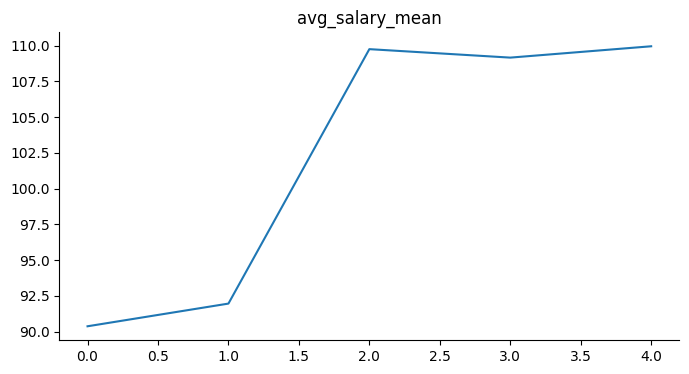

In [ ]:
# @title avg_salary_mean

from matplotlib import pyplot as plt
tool_salary['avg_salary_mean'].plot(kind='line', figsize=(8, 4), title='avg_salary_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
sal_ind_group = df.groupby('industry')['avg_salary'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(sal_ind_group, x="industry", y="avg_salary", color="industry", title="Average-Salary per industry")
fig.show()

In [ ]:
fig = px.bar(df, x="sector", y="avg_salary", color="sector", barmode="group")
fig.show()

In [ ]:
fig = px.bar(df, x="owner_type", y="avg_salary", color="owner_type", barmode="group")
fig.show()

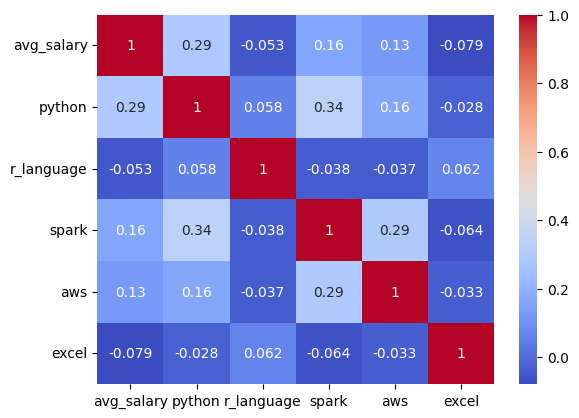

In [ ]:
# Select only numerical columns for the heatmap
numerical_df = ["avg_salary", "python", "r_language", "spark", "aws", "excel"]
df_select = df[numerical_df]

# Calculate the correlation matrix
correlation_matrix = df_select.corr()

# Create the heatmap
pl = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

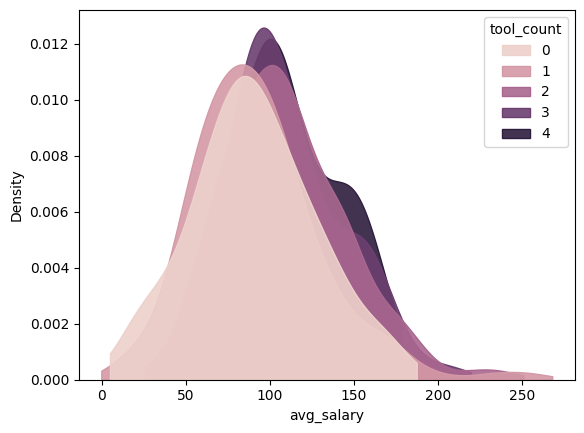

In [ ]:
sns.kdeplot(data=df, x="avg_salary", hue="tool_count", cut=1, fill=True, common_norm=False, alpha=0.9)
plt.show()

In [ ]:
sal_ot_group = df.groupby(['owner_type'])[['avg_salary']].mean().reset_index()
sal_ot_group

,owner_type,avg_salary
0,College / University,109.083333
1,Company - Private,100.186275
2,Company - Public,110.000000
3,Government,80.555556
4,Hospital,57.416667
5,Nonprofit Organization,72.375000
6,Other Organization,80.000000
7,School / School District,77.750000
8,Subsidiary or Business Segment,113.920000


In [ ]:
sal_own_group = df.groupby('owner_type')['avg_salary'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(sal_own_group, x="owner_type", y="avg_salary", color="owner_type", barmode="group", title= "Average salary within each owner type")
fig.show()

In [ ]:
sal_sec_group = df.groupby(['sector'])[['avg_salary']].mean().reset_index()
sal_sec_group

,sector,avg_salary
0,Accounting & Legal,113.500000
1,Aerospace & Defense,99.275000
2,Agriculture & Forestry,80.500000
3,"Arts, Entertainment & Recreation",48.500000
4,Biotech & Pharmaceuticals,113.362903
5,Business Services,96.275362
6,"Construction, Repair & Maintenance",26.500000
7,Consumer Services,100.666667
8,Education,102.535714
9,Finance,98.080000


In [ ]:
sal_sec_group = df.groupby('sector')['avg_salary'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(sal_sec_group, x="sector", y="avg_salary", color="sector", barmode="group", title= "Average salary within each sector")
fig.show()

In [ ]:
# Assuming you have exported the Google Sheet as a CSV file named "Copy of US_GeoCode.csv"
df_geo_codes = pd.read_csv("/content/geo_codes.csv")
df_geo_codes

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
...,...,...,...,...
56,MH,6.068394,171.989379,Marshall Islands
57,MP,15.183333,145.750000,Northern Mariana Islands
58,PW,7.514980,134.582520,Palau
59,PR,-66.105720,18.466330,Puerto Rico


In [ ]:
!pip install fuzzywuzzy python-levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.8 MB/s eta 0:00:00


In [ ]:
#helps to match similar entries where no primary key exists
from fuzzywuzzy import process

df['Best Match'] = df["state"].apply(lambda x: process.extractOne(x, df_geo_codes["state"])[0])
merged_df = pd.merge(df, df_geo_codes, left_on='Best Match', right_on="state")
merged_df

,job_title,rating,size,owner_type,industry,sector,revenue,avg_salary,python,r_language,...,aws,excel,city,state_x,tool_count,Best Match,state_y,latitude,longitude,name
0,Senior Data Engineer,3.2,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),134.0,0,0,...,1,0,Charlotte,NC,2,NC,NC,35.759573,-79.019300,North Carolina
1,Data Scientist,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),96.5,1,0,...,0,0,Portland,OR,2,OR,OR,43.804133,-120.554201,Oregon
2,Data Scientist,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),110.0,1,0,...,0,1,Chantilly,VA,2,VA,VA,37.431573,-78.656894,Virginia
3,Big Data Engineer,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),118.5,1,0,...,0,0,Chantilly,VA,2,VA,VA,37.431573,-78.656894,Virginia
4,Data Scientist,4.5,5001 to 10000 employees,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),130.0,1,0,...,0,1,Laurel,MD,2,MD,MD,39.045755,-76.641271,Maryland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Data Scientist,4.7,501 to 1000 employees,Company - Private,Security Services,Business Services,Unknown / Non-Applicable,85.5,1,0,...,0,0,Syracuse,NY,1,NY,NY,43.299428,-74.217933,New York
461,Research Scientist,3.8,1001 to 5000 employees,Nonprofit Organization,Social Assistance,Non-Profit,Unknown / Non-Applicable,52.5,0,0,...,0,1,Omaha,NE,1,NE,NE,41.492537,-99.901813,Nebraska
462,Data Analytics Manager,3.8,501 to 1000 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,40.5,1,0,...,1,1,Kansas City,MO,3,MO,MO,37.964253,-91.831833,Missouri
463,Sr. Data Scientist,3.7,201 to 500 employees,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,105.0,1,0,...,0,0,Denver,CO,1,CO,CO,39.550051,-105.782067,Colorado


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job_title   465 non-null    object 
 1   rating      465 non-null    float64
 2   size        465 non-null    object 
 3   owner_type  465 non-null    object 
 4   industry    465 non-null    object 
 5   sector      465 non-null    object 
 6   revenue     465 non-null    object 
 7   avg_salary  465 non-null    float64
 8   python      465 non-null    Int64  
 9   r_language  465 non-null    Int64  
 10  spark       465 non-null    Int64  
 11  aws         465 non-null    Int64  
 12  excel       465 non-null    Int64  
 13  city        465 non-null    object 
 14  state_x     465 non-null    object 
 15  tool_count  465 non-null    Int64  
 16  Best Match  465 non-null    object 
 17  state_y     465 non-null    object 
 18  latitude    465 non-null    float64
 19  longitude   465 non-null    f

In [ ]:
#dropping columns "state_x" and "state_y"
df_drop = merged_df.drop(columns=["state_x", "state_y"])
df_drop

,job_title,rating,size,owner_type,industry,sector,revenue,avg_salary,python,r_language,spark,aws,excel,city,tool_count,Best Match,latitude,longitude,name
0,Senior Data Engineer,3.2,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),134.0,0,0,1,1,0,Charlotte,2,NC,35.759573,-79.019300,North Carolina
1,Data Scientist,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),96.5,1,0,1,0,0,Portland,2,OR,43.804133,-120.554201,Oregon
2,Data Scientist,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),110.0,1,0,0,0,1,Chantilly,2,VA,37.431573,-78.656894,Virginia
3,Big Data Engineer,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),118.5,1,0,1,0,0,Chantilly,2,VA,37.431573,-78.656894,Virginia
4,Data Scientist,4.5,5001 to 10000 employees,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),130.0,1,0,0,0,1,Laurel,2,MD,39.045755,-76.641271,Maryland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Data Scientist,4.7,501 to 1000 employees,Company - Private,Security Services,Business Services,Unknown / Non-Applicable,85.5,1,0,0,0,0,Syracuse,1,NY,43.299428,-74.217933,New York
461,Research Scientist,3.8,1001 to 5000 employees,Nonprofit Organization,Social Assistance,Non-Profit,Unknown / Non-Applicable,52.5,0,0,0,0,1,Omaha,1,NE,41.492537,-99.901813,Nebraska
462,Data Analytics Manager,3.8,501 to 1000 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,40.5,1,0,0,1,1,Kansas City,3,MO,37.964253,-91.831833,Missouri
463,Sr. Data Scientist,3.7,201 to 500 employees,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,105.0,1,0,0,0,0,Denver,1,CO,39.550051,-105.782067,Colorado


In [ ]:
#renaming column "Best Match" to "state"
df_renamed = df_drop.rename(columns={"Best Match": "state"})
df_renamed

,job_title,rating,size,owner_type,industry,sector,revenue,avg_salary,python,r_language,spark,aws,excel,city,tool_count,state,latitude,longitude,name
0,Senior Data Engineer,3.2,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),134.0,0,0,1,1,0,Charlotte,2,NC,35.759573,-79.019300,North Carolina
1,Data Scientist,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),96.5,1,0,1,0,0,Portland,2,OR,43.804133,-120.554201,Oregon
2,Data Scientist,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),110.0,1,0,0,0,1,Chantilly,2,VA,37.431573,-78.656894,Virginia
3,Big Data Engineer,3.3,1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),118.5,1,0,1,0,0,Chantilly,2,VA,37.431573,-78.656894,Virginia
4,Data Scientist,4.5,5001 to 10000 employees,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),130.0,1,0,0,0,1,Laurel,2,MD,39.045755,-76.641271,Maryland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Data Scientist,4.7,501 to 1000 employees,Company - Private,Security Services,Business Services,Unknown / Non-Applicable,85.5,1,0,0,0,0,Syracuse,1,NY,43.299428,-74.217933,New York
461,Research Scientist,3.8,1001 to 5000 employees,Nonprofit Organization,Social Assistance,Non-Profit,Unknown / Non-Applicable,52.5,0,0,0,0,1,Omaha,1,NE,41.492537,-99.901813,Nebraska
462,Data Analytics Manager,3.8,501 to 1000 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,40.5,1,0,0,1,1,Kansas City,3,MO,37.964253,-91.831833,Missouri
463,Sr. Data Scientist,3.7,201 to 500 employees,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,105.0,1,0,0,0,0,Denver,1,CO,39.550051,-105.782067,Colorado


In [ ]:
fig = px.scatter_map(df_renamed, lat="latitude", lon="longitude", color="state", size="avg_salary",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=30, zoom= 4,
                  map_style="carto-positron", title = "Distribution of average salary and number of data job within specific stated in the US.")
fig.show()

In [ ]:
df_renamed.to_csv("glassdoor_combined_data.csv")

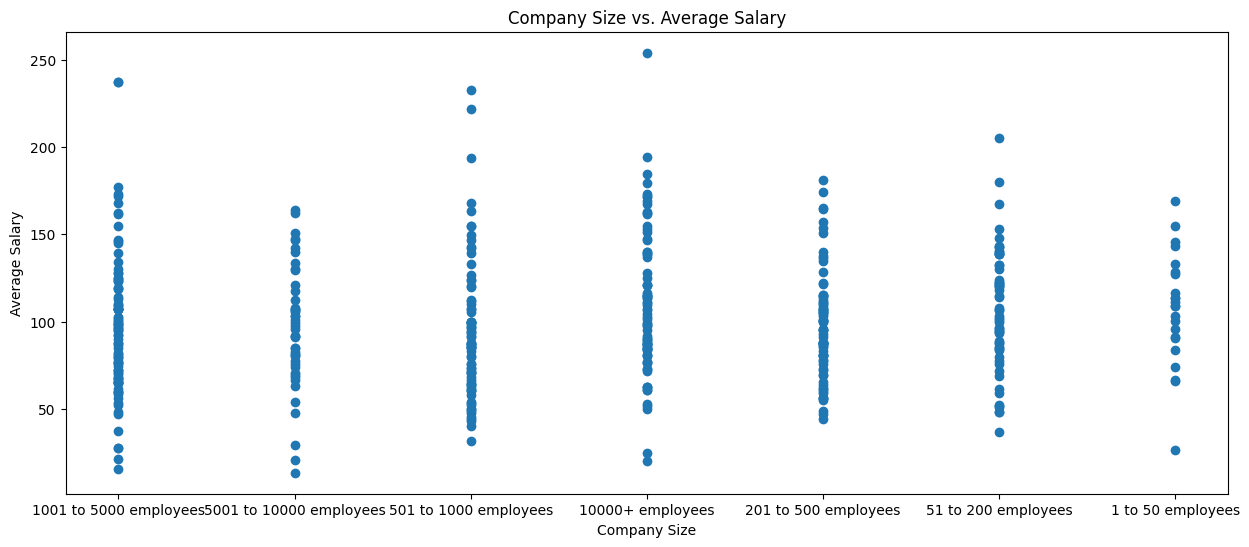

In [ ]:
plt.figure(figsize=(15,6))
# Define x as the 'size' column from df_renamed and y as the 'avg_salary' column
x = df_renamed['size']
y = df_renamed['avg_salary']
plt.scatter(x, y)
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.title("Company Size vs. Average Salary")
plt.show()

<ipython-input-36-8c6b968efb6a>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




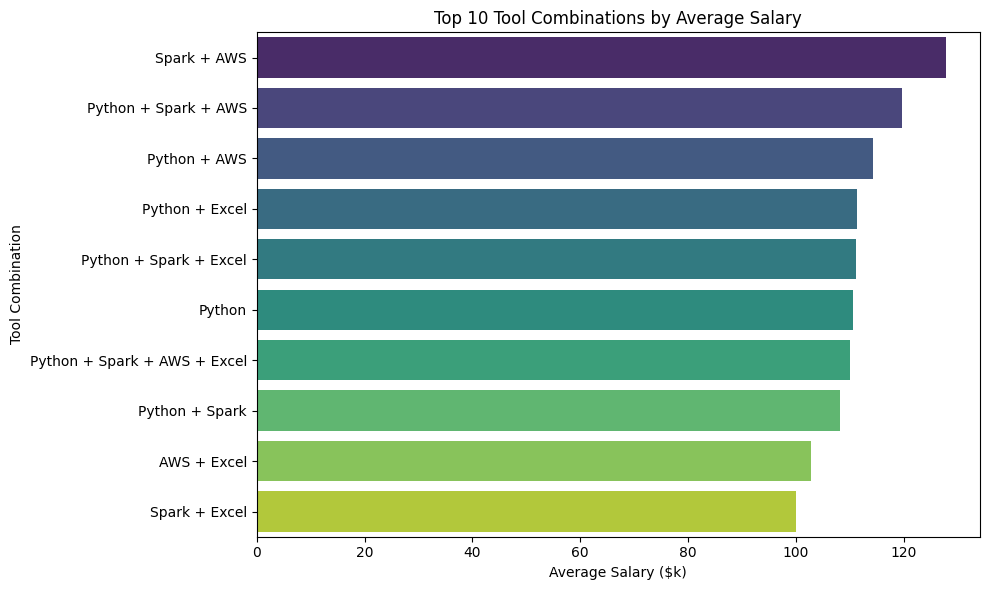

In [ ]:
# list of tool names
tools = ['Python', 'R', 'Spark', 'AWS', 'Excel']

# Create a string representation of the tool combination (e.g., '1_0_1_0_1')
# Assuming the columns 'python', 'r_language', 'spark', 'aws', 'excel' are binary (0 or 1)
df_renamed['tool_combo'] = df_renamed[['python', 'r_language', 'spark', 'aws', 'excel']].astype(str).agg('_'.join, axis=1)

# Calculate the average salary for each tool combination
combo_salary = df_renamed.groupby('tool_combo')['avg_salary'].agg(['mean', 'count']).reset_index()
combo_salary.columns = ['tool_combo', 'avg_salary_mean', 'job_count']

# convert binary string (e.g. 1_0_1_0_1 ) to tool names (e.g. Spark + AWS)
def decode_tool_combo(combo):
    bits = combo.split('_')
    # Ensure the number of bits matches the number of tools
    if len(bits) != len(tools):
        return "Unknown Combo" # Handle potential inconsistencies
    return ' + '.join([tool for bit, tool in zip(bits, tools) if bit == '1'])

# Apply the function to create a human-readable tool combination column
combo_salary['tool_combo_named'] = combo_salary['tool_combo'].apply(decode_tool_combo)


top_salary_named = combo_salary.sort_values(by='avg_salary_mean', ascending= False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_salary_named, x='avg_salary_mean', y='tool_combo_named', palette='viridis')
plt.title('Top 10 Tool Combinations by Average Salary')
plt.xlabel('Average Salary ($k)')
plt.ylabel('Tool Combination')
plt.tight_layout()
plt.show()

In [ ]:
sal_size_group = df_renamed.groupby('size')['avg_salary'].mean().sort_values(ascending=False).reset_index()
fig1 = px.bar(sal_size_group, x= "size", y = "avg_salary", color_discrete_sequence = ["darkmagenta"], title= "Average salary per size of business")
fig1.show()

In [ ]:
sal_rat_group = df_renamed.groupby('rating')['avg_salary'].mean().sort_values(ascending=False).reset_index()
fig2 = px.bar(sal_rat_group, x= "rating", y = "avg_salary", color_discrete_sequence = ["orange"], title= "Average salary per rating" )
fig2.show()

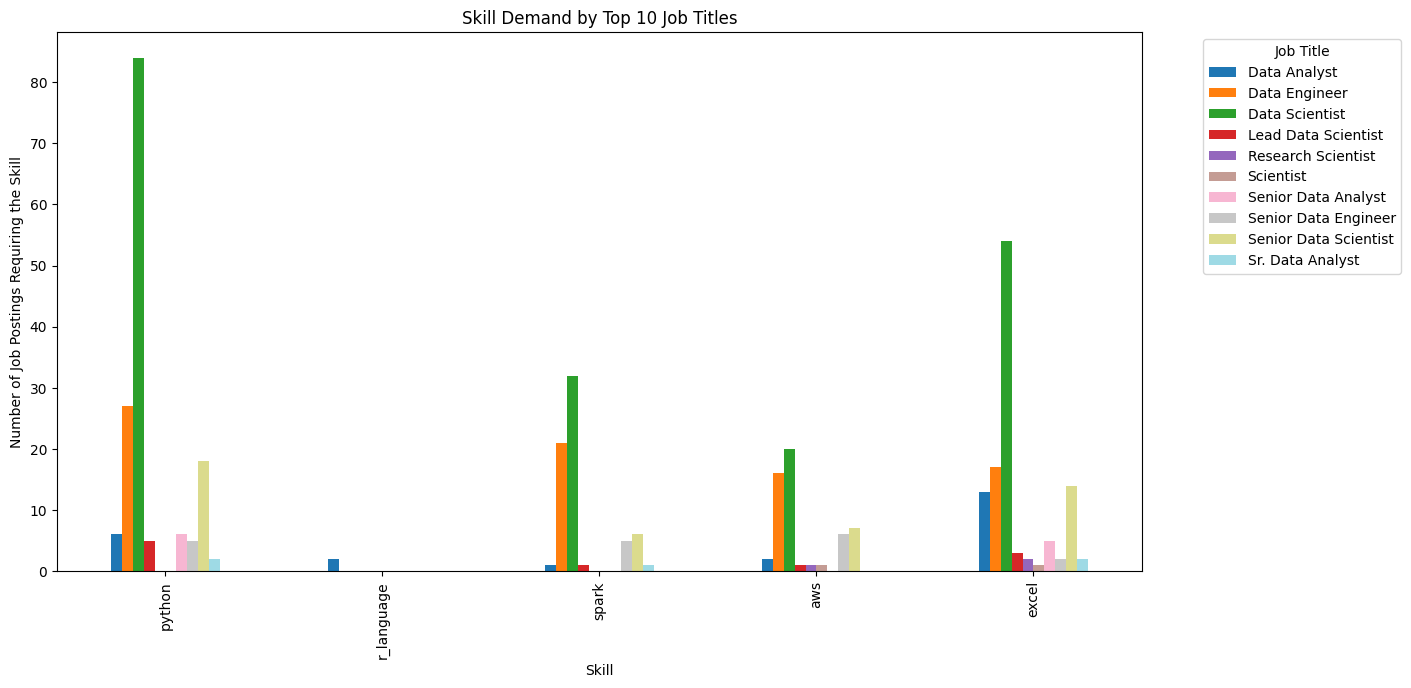

In [ ]:
# Identify top 10 job titles based on frequency
top_titles = df_renamed['job_title'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 job titles
df_top_titles = df_renamed[df_renamed['job_title'].isin(top_titles)].copy()

# Group by job title and sum the skill columns
skill_by_top_titles = df_top_titles.groupby('job_title')[['python', 'r_language', 'spark', 'aws', 'excel']].sum()

# Transpose the DataFrame for plotting
skill_by_top_titles_T = skill_by_top_titles.T

# Now you can proceed with the plotting code:
skill_by_top_titles_T.plot(kind='bar', figsize=(14, 7), colormap='tab20')
plt.title('Skill Demand by Top 10 Job Titles')
plt.ylabel('Number of Job Postings Requiring the Skill')
plt.xlabel('Skill')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Before plotting the overall skill demand, create the skill_demand_df
# Sum the skill columns across the entire DataFrame to get the total demand for each skill
skill_demand_df = df_renamed[['python', 'r_language', 'spark', 'aws', 'excel']].sum().reset_index()
skill_demand_df.columns = ['Skill', 'Number of Job Postings']
skill_demand_df

,Skill,Number of Job Postings
0,python,261
1,r_language,2
2,spark,113
3,aws,111
4,excel,249


In [ ]:
jobpost_skill_group = skill_demand_df.groupby('Skill')['Number of Job Postings'].mean().sort_values(ascending=False).reset_index()
fig = px.histogram(jobpost_skill_group, x= "Skill", y = "Number of Job Postings", color = "Skill", title = "Skill Set Demand Across All Job Postings", barmode = "relative")
fig.show()

In [ ]:
df_group = df_renamed.groupby(["python", "excel", "r_language", "spark", "aws"])[["state", "city"]].min()
df_group

state          city
python excel r_language spark aws                    
0      0     0          0     0      AZ       Atlanta
                              1      IN     Allendale
                        1     0      NY       Houston
                              1      CA        Austin
       1     0          0     0      AK       Alameda
                              1      CA     Cambridge
                        1     0      CA        Boston
                              1      DC        Boston
1      0     0          0     0      CA     Arlington
                              1      CA        Austin
                        1     0      AZ       Ashburn
                              1      AZ        Boston
       1     0          0     0      AL   Albuquerque
                              1      CA  Agoura Hills
                        1     0      CA     Arlington
                              1      AL   Aliso Viejo
             1          0     0      CA      Meridian

In [ ]:
df_renamed.sort_values(by= "tool_count", ascending = True).head(100)

,job_title,rating,size,owner_type,industry,sector,revenue,avg_salary,python,r_language,spark,aws,excel,city,tool_count,state,latitude,longitude,name,tool_combo
20,Senior Data Science Systems Engineer,3.2,5001 to 10000 employees,Nonprofit Organization,Federal Agencies,Government,$1 to $2 billion (USD),77.5,0,0,0,0,0,Hampton,0,VA,37.431573,-78.656894,Virginia,0_0_0_0_0
30,Senior Research Statistician- Data Scientist,4.8,1001 to 5000 employees,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),100.5,0,0,0,0,0,Sheboygan,0,WI,43.784440,-88.787868,Wisconsin,0_0_0_0_0
416,Sr Data Engineer (Sr BI Developer),3.4,501 to 1000 employees,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,100.0,0,0,0,0,0,Chandler,0,AZ,34.048928,-111.093731,Arizona,0_0_0_0_0
444,Data Scientist - Alpha Insights,4.4,1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,172.0,0,0,0,0,0,New York,0,NY,43.299428,-74.217933,New York,0_0_0_0_0
417,Medical Lab Scientist,3.6,5001 to 10000 employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,20.5,0,0,0,0,0,West Reading,0,PA,41.203322,-77.194525,Pennsylvania,0_0_0_0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,"Data Scientist, Rice University",4.3,1001 to 5000 employees,Subsidiary or Business Segment,Education Training Services,Education,Unknown / Non-Applicable,87.5,1,0,0,0,0,Houston,1,TX,31.968599,-99.901813,Texas,1_0_0_0_0
374,Senior Data Analyst,3.9,51 to 200 employees,Company - Public,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,138.5,1,0,0,0,0,San Francisco,1,CA,36.778261,-119.417932,California,1_0_0_0_0
371,Data Engineer,3.7,501 to 1000 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,70.5,0,0,0,0,1,Lafayette,1,LA,31.244823,-92.145024,Louisiana,0_0_0_0_1
370,Principal Machine Learning Scientist,4.7,501 to 1000 employees,Subsidiary or Business Segment,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,232.5,1,0,0,0,0,San Francisco,1,CA,36.778261,-119.417932,California,1_0_0_0_0
